In [1]:
from data_process import TransactionRecord, read_transactions, write_answers
from train_helper import TrainHelper
from knn_regressor import KNNRegressor
from solver import Solver
from testing import cross_validation
from drawing import *
from utils import *

TRAIN_FILE = "filtered_train_set.csv"
TEST_FILE = "filtered_test_set.csv"

In [2]:
%%time

transactions = read_transactions(TRAIN_FILE)
print(transactions[0])
print("Number of customers:", len(set(map(lambda x: x.customer_id, transactions))))
print("Number of transactions:", len(transactions))

TR{id: 0dc0137d280a2a82d2dc89282450ff1b, home: [ 59.851  30.232], work: [ 59.847  30.177], pos: [ 59.84407235  30.17915263]}
Number of customers: 10000
Number of transactions: 1127294
Wall time: 2min 35s


In [3]:
# print(len(set(list(transactions))))

print(len(Counter(transactions).keys()))

# print(len(Counter(map(lambda x: tuple(x.pos), transactions))))

432908


In [7]:
train_helper = TrainHelper(cnt_treshold=0)

t = train_helper.count(transactions)

print(len(t))

t = train_helper.extract_best(t)

print(len(t))

756308
653094


In [185]:
%%time

cust_trans = group_by_customer(transactions)

Wall time: 15.6 ms


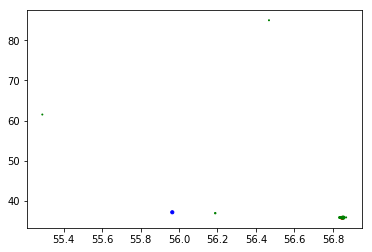

In [212]:
import random
item = random.choice(cust_trans)

draw_customer_info(item[1])

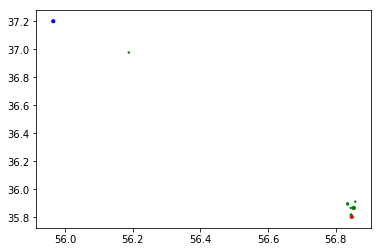

In [213]:
train_helper = TrainHelper(cnt_treshold=1)

t2 = train_helper.extract_best(item[1])
draw_customer_info(t2)

In [3]:
%%time

cust_trans = np.array(group_by_customer(transactions))

permutation = np.random.permutation(range(len(cust_trans)))
for k in range(8, 9):
    print('k ==', k, flush=True)
    solver = Solver(k_neighbors=k, cnt_treshold=0)
    print(cross_validation(solver, cust_trans, permutation))

k == 8


C:\Users\Anton\Anton\programming\ai\raiffeisen_data_cup\data_process.py:90: RuntimeWarning: divide by zero encountered in double_scalars
  return min(self.cnt / distance(self.pos, get_y(self)), INF)
C:\Users\Anton\Anton\programming\ai\raiffeisen_data_cup\knn_regressor.py:31: RuntimeWarning: divide by zero encountered in double_scalars
  weights = [min(INF, self.train_w[neigh[i]] / dist[i]) for i in range(len(neigh))]
C:\Users\Anton\Anton\programming\ai\raiffeisen_data_cup\predict_helper.py:14: RuntimeWarning: divide by zero encountered in double_scalars
  w[i] = min(w[i] / distance(x, mid), INF)


0.9671000000000001
Wall time: 33min 39s


In [6]:
FOR CNT_TRESHOLD=1, DIST_TRESHOLD=1
k == 3
0.027906976744186046
k == 4
0.027131782945736434
k == 5
0.028682170542635655
k == 6
0.026356589147286818

FOR CNT_TRESHOLD=0, DIST_TRESHOLD=1
k == 3
0.03565891472868217
k == 4
0.03255813953488372
k == 5
0.037209302325581395
k == 6
0.03565891472868217
k == 7

FOR CNT_TRESHOLD=0, DIST_TRESHOLD=1, WEIGHTED BY DIST Y IN PREPARING
k == 1
0.034108527131782945
k == 2
0.03565891472868217
k == 3
0.03798449612403101
k == 4
0.03875968992248062
k == 5

C:\Users\Anton\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


array([ inf])

In [4]:
help(np.average)

Help on function average in module numpy.lib.function_base:

average(a, axis=None, weights=None, returned=False)
    Compute the weighted average along the specified axis.
    
    Parameters
    ----------
    a : array_like
        Array containing data to be averaged. If `a` is not an array, a
        conversion is attempted.
    axis : None or int or tuple of ints, optional
        Axis or axes along which to average `a`.  The default,
        axis=None, will average over all of the elements of the input array.
        If axis is negative it counts from the last to the first axis.
    
        .. versionadded:: 1.7.0
    
        If axis is a tuple of ints, averaging is performed on all of the axes
        specified in the tuple instead of a single axis or all the axes as
        before.
    weights : array_like, optional
        An array of weights associated with the values in `a`. Each value in
        `a` contributes to the average according to its associated weight.
        Th

In [19]:
np.average([1, 2, 3], weights=[1, 1, 1e18])

3.0

In [22]:
1e2010 == np.inf

True

In [26]:
min(1e2100, np.inf)

inf

In [31]:
np.average(range(3), weights=range(3))

1.6666666666666667

In [38]:
np.average([np.array([1, 1]), np.array([2, 2])], axis=0, weights=[1, 10])

array([ 1.90909091,  1.90909091])

In [43]:
np.average([np.array([1, 1])], axis=0, weights=[1])

array([ 1.,  1.])

In [44]:
np.average(range(3), weights=[1, 1, 1])

1.0

In [46]:
p = [np.array([1, 1]), np.array([2, 2])]
np.average(map(lambda x: x, p), axis=0, weights=[1, 1])

IndexError: tuple index out of range